# Problem Statement:

To make a suitable machine learning algorithm to predict if the mushroom is 
edible or poisonous (e or p) using the given dataset.

In [61]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [62]:
#reading dataset
df=pd.read_csv(r'C:\DSA\WEEK 15\CASE STUDY\mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [63]:
df.shape

(8124, 23)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Properties:Dataset has 23 columns and 8124 records. All are object data types.

In [65]:
#checking null values
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no null values in the dataset 

In [66]:
#checking distinct values in each feature
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [67]:
#droping the column veil-type
df=df.drop('veil-type',axis=1)


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [69]:
#ENCODING
# label encoding 
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
for i in df.columns:
    df[i]=label_en.fit_transform(df[i])
df    

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


<AxesSubplot:>

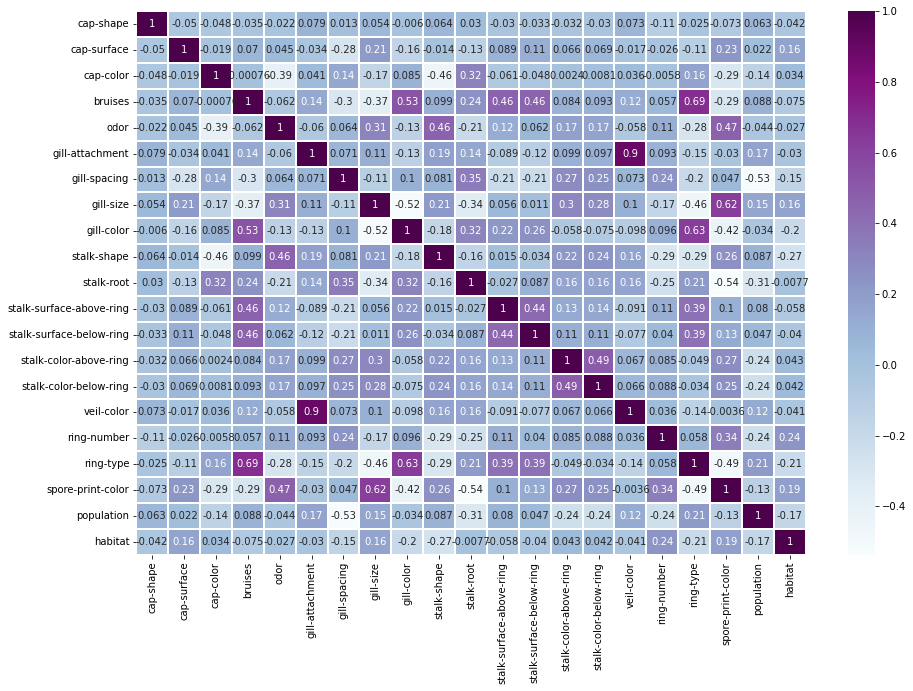

In [70]:
#Checking correlation of variables
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),annot=True,linewidths=0.02,cmap='BuPu')

from the correleation heatmap plot gill-attachment and veil-color is having high correlation

In [71]:
#splitting the dataset
X=df.drop(['class'],axis=1)
y=pd.DataFrame(df['class'])

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

# Modelling

In [73]:
#importing the modelling libraries
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1.KNN

Text(0, 0.5, 'accuracy')

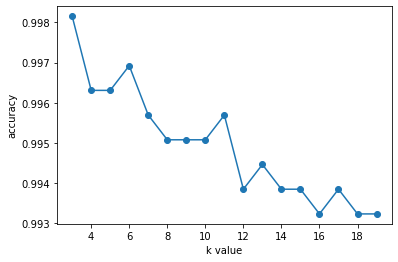

In [74]:
import warnings
warnings.filterwarnings('ignore')
#KNN
acc_values=[]
neighbors=np.arange(3,20)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
#print(acc_values) 
#plotting graph
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

Accuracy is hghest for k value=3 so taking the  k=3

In [75]:
classifier= KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(X_train,y_train) 
y_pred=classifier.predict(X_test)
print('F1 Score',f1_score(y_test,y_pred))
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print(' Classification Report\n',classification_report(y_test,y_pred))
#,pos_label='e'

F1 Score 0.998085513720485
Accuracy Score 0.9981538461538462
Confusion Matrix
 [[840   3]
 [  0 782]]
 Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Accuracy Score is 0.99

In [76]:
#for other models
models = {
    '     Gaussian Naive Bayes' : GaussianNB(),
    '  Multinomial Naive Bayes' : MultinomialNB(),
    '    Bernoulli Naive Bayes' : BernoulliNB(),
    '  Categorical Naive Bayes' : CategoricalNB(),
    '      Logistic Regression' : LogisticRegression(),
    '     KNeighborsClassifier' : KNeighborsClassifier(),
    '               SVC Linear' : SVC(kernel='linear'),
    '           SVC Polynomial' : SVC(kernel='poly',degree=2),
    '                  SVC RBF' : SVC(kernel='rbf'),
    ' Decision Tree Classifier' : DecisionTreeClassifier(),
    ' Random Forest Classifier' : RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

     Gaussian Naive Bayes trained.
  Multinomial Naive Bayes trained.
    Bernoulli Naive Bayes trained.
  Categorical Naive Bayes trained.
      Logistic Regression trained.
     KNeighborsClassifier trained.
               SVC Linear trained.
           SVC Polynomial trained.
                  SVC RBF trained.
 Decision Tree Classifier trained.
 Random Forest Classifier trained.


In [77]:
# def get_rmse(y_true,y_pred):
#     rmse = np.sqrt(np.mean((y_test-y_pred)**2))
#     return rmse
#defining functions for evaluation of various models
def get_confusion_matrix(y_test,prediction):
    conf_matrix = confusion_matrix(y_test,prediction)
    return conf_matrix
def get_accuracy_score(y_test,prediction):
    accuracy = accuracy_score(y_test,prediction)
    return accuracy
def get_precision_score(y_test,prediction):
    precision = precision_score(y_test,prediction)
    return precision
def get_recall_score(y_test,prediction):
    recall = recall_score(y_test,prediction)
    return recall
def get_f1_score(y_test,prediction):
    f1 = f1_score(y_test,prediction)
    return f1
def get_cross_val_score(model,X_train,y_train):
    cross_val_scores = cross_val_score(model,X_train,y_train,cv=10)
    avg_cross_val_score=cross_val_scores.mean()
    return avg_cross_val_score
def get_roc_auc_score(y_test,prediction):
    roc_auc = roc_auc_score(y_test,prediction)
    return roc_auc

In [86]:
model_new= pd.DataFrame(columns = ["Confusion_matrix", "Accuracy", "F1_score","Recall","Precision", "Cross_validation","ROC_AUC"],
                  index=['     Gaussian Naive Bayes','  Multinomial Naive Bayes','    Bernoulli Naive Bayes',
                        '  Categorical Naive Bayes','      Logistic Regression','     KNeighborsClassifier',
                        '               SVC Linear','           SVC Polynomial','                  SVC RBF',
                        ' Decision Tree Classifier',' Random Forest Classifier'])



In [87]:
# Calculation of different scores of each model
for name, model in models.items():
    prediction = model.predict(X_test)
    con_matrix = get_confusion_matrix(y_test, prediction)
    model_new.at[name,"Confusion_matrix"]=con_matrix
    acc = get_accuracy_score(y_test, prediction)
    model_new.at[name,"Accuracy"]=acc
    f1 = get_f1_score(y_test, prediction)
    model_new.at[name,"F1_score"]=f1
    recal = get_recall_score(y_test, prediction)
    model_new.at[name,"Recall"]=recal
    prec = get_precision_score(y_test, prediction)
    model_new.at[name,"Precision"]=prec
    xval = get_cross_val_score(model,X_train,y_train)
    model_new.at[name,"Cross_validation"]=xval
    roc = get_roc_auc_score(y_test, prediction)
    model_new.at[name,"ROC_AUC"]=roc
model_new 

,Confusion_matrix,Accuracy,F1_score,Recall,Precision,Cross_validation,ROC_AUC
Gaussian Naive Bayes,"[[771, 72], [55, 727]]",0.921846,0.919671,0.929668,0.909887,0.923987,0.922129
Multinomial Naive Bayes,"[[792, 51], [262, 520]]",0.807385,0.768662,0.664962,0.910683,0.804587,0.802232
Bernoulli Naive Bayes,"[[797, 46], [211, 571]]",0.841846,0.816297,0.730179,0.925446,0.846897,0.837806
Categorical Naive Bayes,"[[837, 6], [74, 708]]",0.950769,0.946524,0.905371,0.991597,0.95353,0.949127
Logistic Regression,"[[798, 45], [41, 741]]",0.947077,0.945153,0.94757,0.942748,0.951992,0.947095
KNeighborsClassifier,"[[837, 6], [0, 782]]",0.996308,0.996178,1.0,0.992386,0.998461,0.996441
SVC Linear,"[[829, 14], [30, 752]]",0.972923,0.971576,0.961637,0.981723,0.964763,0.972515
SVC Polynomial,"[[835, 8], [12, 770]]",0.987692,0.987179,0.984655,0.989717,0.981382,0.987582
SVC RBF,"[[842, 1], [9, 773]]",0.993846,0.993573,0.988491,0.998708,0.988614,0.993652
Decision Tree Classifier,"[[843, 0], [0, 782]]",1.0,1.0,1.0,1.0,1.0,1.0


From the table we can conclude that Decision Tree and Random Forest Classifiers are 
giving the best results. 
From  the Naive Bayes classifiers the Gaussian model gives better results.